<a href="https://colab.research.google.com/github/SanchitVj1799/C4_SMP_ML/blob/master/week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

In [0]:
digit  = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = digit.load_data()

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


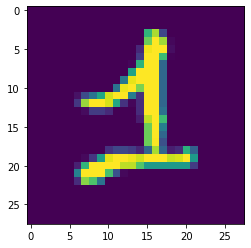

In [46]:
plt.imshow(X_train[24])

In [0]:
X_train = X_train / 255
X_test = X_test / 255

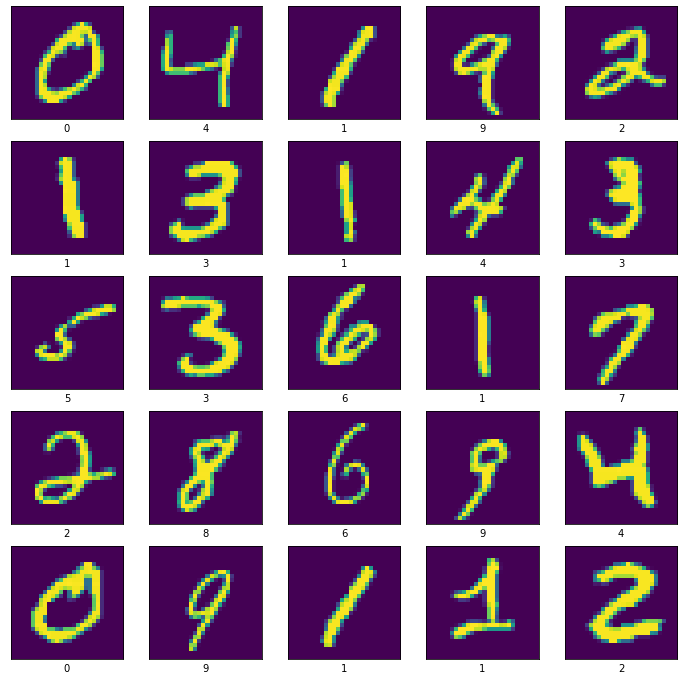

In [48]:
plt.figure(figsize=(12,12))
for i in range(1,26):
    plt.subplot(5,5, i)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
    plt.xticks([])
    plt.yticks([])


In [0]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')

In [0]:
earlystop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')

In [56]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size= 128, callbacks= [earlystop], epochs=15)

Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0278 - accuracy: 0.9909 - val_loss: 0.0959 - val_accuracy: 0.9751
Epoch 2/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0220 - accuracy: 0.9930 - val_loss: 0.0912 - val_accuracy: 0.9761
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0224 - accuracy: 0.9923 - val_loss: 0.0924 - val_accuracy: 0.9750
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0178 - accuracy: 0.9944 - val_loss: 0.0858 - val_accuracy: 0.9788
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0996 - val_accuracy: 0.9777
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0174 - accuracy: 0.9942 - val_loss: 0.0991 - val_accuracy: 0.9775
Epoch 7/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0171 - accuracy: 0.9943 - val_loss: 0.0892 - val_accuracy: 0.9815
Epoch 

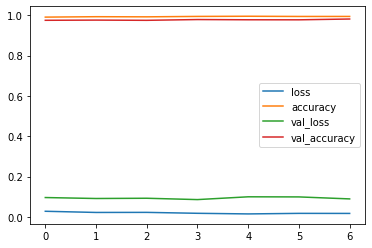

In [57]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [58]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0892 - accuracy: 0.9815


[0.08916644006967545, 0.9815000295639038]